In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
from scipy.optimize import curve_fit

In [23]:
data = pd.read_csv('data/ordertraf_rouprd.csv',sep='\t')

In [24]:
data.head()

,user_id,product_line_type_name,route_class_parent_name,create_time,create_time_next,ordertype,ts,freq
0,10004914,其他,单资源,2018-03-22 10:50:52,2018-03-27 01:03:12,1,19,34
1,10005916,国内长线,度假,2018-03-27 11:35:38,2018-03-27 11:35:38,1,24,7
2,10006158,其他,单资源,2018-04-10 19:44:34,2018-04-13 13:18:02,1,52,17
3,10006634,其他,单资源,2018-04-09 10:56:54,2018-04-09 10:56:54,1,22,7
4,10006634,出境短线,度假,2018-03-18 16:56:42,2018-03-18 16:56:42,1,1,8


In [25]:
data.loc[(data.product_line_type_name=='出境长线')&(data.route_class_parent_name=='度假'),'ts'].head()

27     32
90     21
120    15
175    29
198    34
Name: ts, dtype: int64

In [26]:
prdtypes = ['度假','单资源']
routeclass = ['国内长线','周边','其他','出境长线','出境短线']

In [27]:
"""
输入：一个Series
输出：描述用户兴趣度随时间衰减的数组
"""
def calc_inter(sample):
    if not isinstance(sample,pd.Series):
        print("类型异常，退出")
        return -1
    max_value = sample.value_counts().index.max()
    ts = np.arange(1,max_value+1)
    amounts =[]
    for i in ts:
        amount = len(sample[sample==i])/len(sample)
        amounts.append(amount)
    amount_j = []
    j=0
    for i in amounts:
        j = j+i
        amount_j.append(j)
    usr_inter = 1-np.array(amount_j)
    return usr_inter

In [28]:
"""
usr_inters1存储品类目的地大类的兴趣度衰减数据
"""
usr_inters1={}
for prd in prdtypes:
    usr_inters2 = {}
    for rou in routeclass:
        sample = data.loc[(data.route_class_parent_name==prd)&(data.product_line_type_name==rou),'ts']
        if len(sample)==0:
            print("不包含{}*{}组合项目".format(prd,rou))
            continue
        print(len(sample))
        print("----{}*{}....计算.....---".format(prd,rou))
        usr_inter = calc_inter(sample)
        usr_inters2[rou]=usr_inter
    usr_inters1[prd]=usr_inters2

22074
----度假*国内长线....计算.....---
36354
----度假*周边....计算.....---
2681
----度假*其他....计算.....---
5219
----度假*出境长线....计算.....---
12470
----度假*出境短线....计算.....---
165
----单资源*国内长线....计算.....---
71
----单资源*周边....计算.....---
396142
----单资源*其他....计算.....---
77
----单资源*出境长线....计算.....---
724
----单资源*出境短线....计算.....---


In [37]:
usr_inters1['度假']['出境长线']

array([ 8.31960146e-01,  7.76202338e-01,  7.38072428e-01,  7.12013796e-01,
        6.83464265e-01,  6.62387431e-01,  6.43993102e-01,  6.22916267e-01,
        6.05863192e-01,  5.89576547e-01,  5.76930446e-01,  5.66392029e-01,
        5.52404675e-01,  5.39375359e-01,  5.26729258e-01,  5.11783867e-01,
        4.98754551e-01,  4.84958804e-01,  4.71929488e-01,  4.57942135e-01,
        4.42613527e-01,  4.28242958e-01,  4.15788465e-01,  3.97968960e-01,
        3.81490707e-01,  3.64246024e-01,  3.43360797e-01,  3.25924507e-01,
        3.05230887e-01,  2.88752635e-01,  2.67100977e-01,  2.50431117e-01,
        2.35102510e-01,  2.20923549e-01,  2.04828511e-01,  1.88158651e-01,
        1.76470588e-01,  1.64016095e-01,  1.50411956e-01,  1.38723893e-01,
        1.27610653e-01,  1.15539375e-01,  1.04234528e-01,  9.38877180e-02,
        8.25828703e-02,  7.31940985e-02,  6.41885419e-02,  5.61410232e-02,
        4.69438590e-02,  3.81299099e-02,  2.91243533e-02,  2.26096953e-02,
        1.59034298e-02,  

In [30]:
def func(x,a,b):  
    return  b*(a**(x-1))

In [31]:
def max_index(sample):
    return sample.value_counts().index.max()

In [32]:
for prd in prdtypes:
    for rou in routeclass:
        index = max_index(data.loc[(data.route_class_parent_name==prd)&(data.product_line_type_name==rou),'ts'])
        x = np.arange(1,index+1)
        y = usr_inters1[prd][rou]
        popt, pcov = curve_fit(func, x, y)
        print("{}*{}的参数：a ={}..b={}".format(prd,rou,popt[0],popt[1]))      

度假*国内长线的参数：a =0.9532165029359166..b=0.6618121882463135
度假*周边的参数：a =0.9469899663700325..b=0.5288981746339304
度假*其他的参数：a =0.9345533055304496..b=0.5102333091965469
度假*出境长线的参数：a =0.958982332122605..b=0.8628901833691923
度假*出境短线的参数：a =0.9547336632486573..b=0.7902818206791943
单资源*国内长线的参数：a =0.9297454227175311..b=0.48943488056724327
单资源*周边的参数：a =0.9312821200153344..b=0.3813359735370496
单资源*其他的参数：a =0.9558989479912866..b=0.5043282454988164
单资源*出境长线的参数：a =0.9413068665110662..b=0.5523040297149955
单资源*出境短线的参数：a =0.9435080061342954..b=0.6387317404996717


In [33]:
sample = data.loc[(data.product_line_type_name=='出境长线')&(data.route_class_parent_name=='度假'),'ts']

In [34]:
sample.value_counts()

1     877
2     291
3     199
5     149
4     136
31    113
8     110
6     110
27    109
29    108
7      96
24     93
28     91
26     90
9      89
32     87
36     87
25     86
30     86
10     85
35     84
33     80
21     80
16     78
22     75
34     74
20     73
13     73
18     72
39     71
14     68
17     68
19     68
11     66
15     66
23     65
38     65
42     63
37     61
40     61
45     59
43     59
41     58
12     55
44     54
46     49
49     48
47     47
51     47
50     46
48     42
53     35
52     34
54     30
56     17
55     15
57     11
58     10
Name: ts, dtype: int64

In [35]:
sample.value_counts().sum()

5219

<Container object of 58 artists>

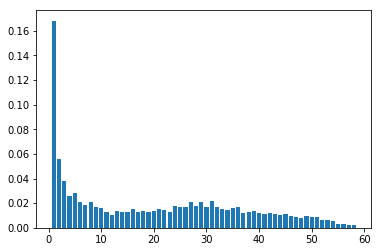

In [39]:

plt.bar(sample.value_counts().index,sample.value_counts()/sample.value_counts().sum())